In [64]:
from numpy import mean
from numpy import std

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold ,RepeatedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

bd=load_boston()
X=pd.DataFrame(bd.data,columns=bd.feature_names)
y=pd.Series(bd.target)

X.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
https://www.youtube.com/watch?v=b7JuBsswDlo&ab_channel=AppliedAICourse 
corr_matrix = np.corrcoef(x.T)
pd.DataFrame(corr_matrix)

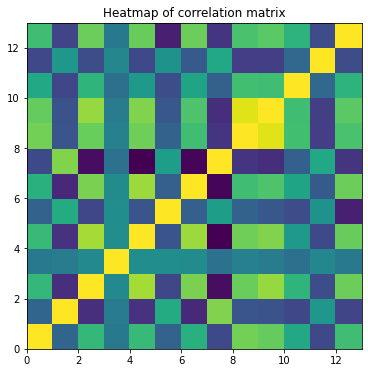

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

In [57]:
select = SelectKBest(score_func=f_regression, k=8)
z = select.fit_transform(X, y) 
filter = select.get_support()
features = np.array(bd.feature_names)

In [65]:
print(features[filter])
X=X[features]

['CRIM' 'INDUS' 'NOX' 'RM' 'RAD' 'TAX' 'PTRATIO' 'LSTAT']


In [66]:

#scale=StandardScaler()
#scaled_data = scale.fit_transform(data) 
#test_predict = scaler.inverse_transform(test_predict)
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

search_space={}
search_space["alpha"]=[0.15,0.10,0.08,0.05,0.02]
search_space["n_estimators"]=[3,5,10,20,50]
search_space["max_depth"]=[15,10,7,8,3]
search_space["min_samples_split"]=[2,3,4,5,10]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
tuner=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=search_space, scoring='r2', cv=cv)
tuner.fit(x_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 mi...
                                                 presort='deprecated',
                                          

In [67]:
print(tuner.best_params_, tuner.best_score_)
bp=tuner.best_params_
model =GradientBoostingRegressor(n_estimators=bp["n_estimators"],max_depth=bp["max_depth"], min_samples_split=bp["min_samples_split"], alpha=bp["alpha"])
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

#coefficient of determination
score=r2_score(y_predicted,y_test)
residuals=mean_squared_error(y_predicted,y_test)
print(score,residuals)



{'alpha': 0.05, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 50} 0.8645467316224792
0.9102513121294137 6.441957906854423


Text(0.5, 1.0, 'Feature Importance')

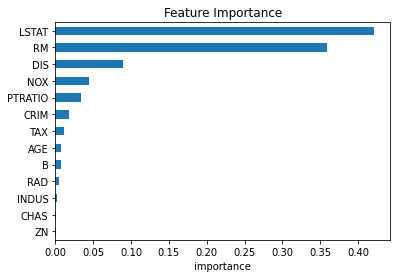

In [68]:
import matplotlib.pyplot as plt 
feat_importances = pd.Series(model.feature_importances_, index=bd.feature_names)
feat_importances.sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [61]:
import statsmodels
import statsmodels.regression.linear_model as lm
lasso=lm.OLS.fit_regularized(L1_wt=1.0,alpha=1)



NameError: name 'self' is not defined

In [1]:
# random search linear regression model on the auto insurance dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot


model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -29.02809240024379
Best Hyperparameters: {'alpha': 0.03064709917930863, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}
